In [1]:
import numpy as np 
from PIL import Image
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg



In [2]:
from keras.applications.vgg16 import VGG16
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
vgg16 = VGG16(weights='imagenet', include_top=False, 
              pooling='max', input_shape=(224, 224, 3))

# print the summary of the model's architecture.
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
for model_layer in vgg16.layers:
  model_layer.trainable = False

In [5]:
def load_image(image_path):
    """
        -----------------------------------------------------
        Process the image provided. 
        - Resize the image 
        -----------------------------------------------------
        return resized image
    """

    input_image = Image.open(image_path)
    resized_image = input_image.resize((224, 224))

    return resized_image

In [6]:
def get_image_embeddings(object_image : image):
    
    """
      -----------------------------------------------------
      convert image into 3d array and add additional dimension for model input
      -----------------------------------------------------
      return embeddings of the given image
    """

    image_array = np.expand_dims(image.img_to_array(object_image), axis = 0)
    image_embedding = vgg16.predict(image_array)

    return image_embedding

In [7]:
def get_similarity_score(first_image : str, second_image : str):
    """
        -----------------------------------------------------
        Takes image array and computes its embedding using VGG16 model.
        -----------------------------------------------------
        return embedding of the image
        
    """

    first_image = load_image(first_image)
    second_image = load_image(second_image)

    first_image_vector = get_image_embeddings(first_image)
    second_image_vector = get_image_embeddings(second_image)
    
    similarity_score = cosine_similarity(first_image_vector, second_image_vector).reshape(1,)

    return similarity_score

In [8]:

def show_image(image_path):
  image = mpimg.imread(image_path)
  
  plt.imshow(image)
  plt.show()

In [20]:
# define the path of the images
lost = 'lost.jpg'
found = 'found.jpg'
alternative = 'alternative.jpg'
alter2 = 'alter2.jpg'
different = 'different.jpg'
left = '1.jpg'
k1 = 'k1.jpg'
k2 = 'k2.jpg'
k3 = 'k3.jpg'
tk = 'tk.jpg'
lamp = 'lamp1.jpg'
lamp2 = 'lamp2.jpg'
random = 'random.jpg'

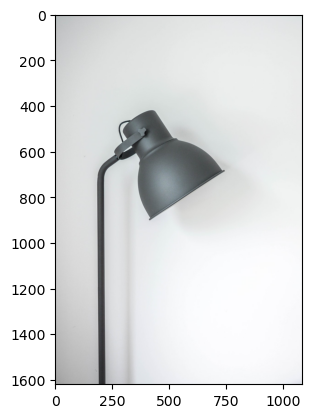

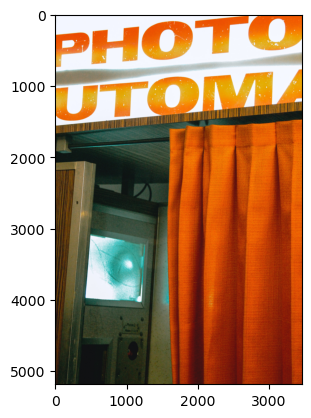

(None, None)

In [21]:
# use the show_image function to plot the images
show_image(lamp), show_image(random)

In [22]:
similarity_score = get_similarity_score(lamp2, random)
print(similarity_score)

1/1 [==============================] - 0s 100ms/step
[0.33450615]


In [12]:
if similarity_score[0]>0.6:
    print(1)
    

1


In [13]:
import tensorflow as tf
from tensorflow import keras,lite

In [14]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(vgg16)
tflite_model = converter.convert()

# Save the model.
with open('vgg16.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\hanbo\AppData\Local\Temp\tmpj8f81moj\assets


INFO:tensorflow:Assets written to: C:\Users\hanbo\AppData\Local\Temp\tmpj8f81moj\assets
